# Analisis Statistik: Median dengan Python

# import library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Perhitungan median dasar

## data

In [9]:
data = [12, 15, 17, 20, 22, 25, 28, 30, 150]

## hitung median

In [10]:
median = np.median(data)
mean = np.mean(data)

In [11]:
print(f"Data: {data}")
print(f"Median: {median}")
print(f"Mean: {mean}")

Data: [12, 15, 17, 20, 22, 25, 28, 30, 150]
Median: 22.0
Mean: 35.44444444444444


# 2. Visualisasi Median vs Mean

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


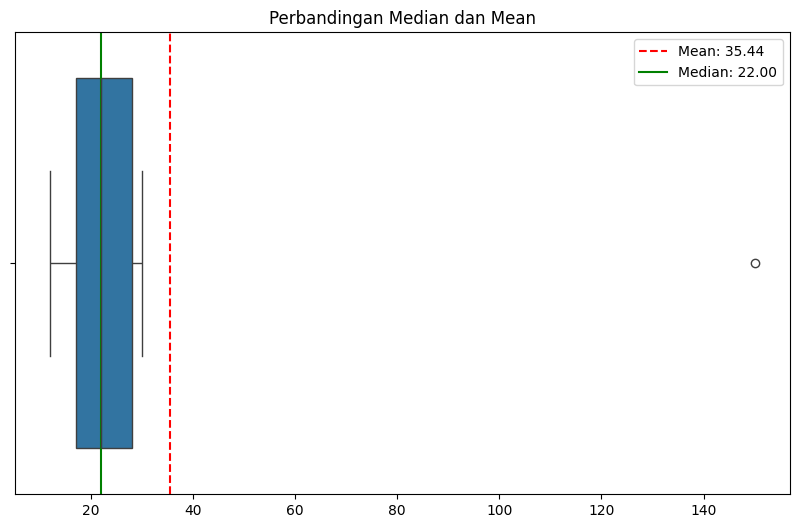

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, orient='h')
plt.axvline(mean, color='r', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', label=f'Median: {median:.2f}')
plt.title('Perbandingan Median dan Mean')
plt.legend()
plt.show()

# 3. Median untuk Data Berkelompok

## dataframe

In [13]:
df = pd.DataFrame({
    'Nilai': [50, 60, 65, 70, 70, 75, 80, 85, 90, 95, 100, 150],
    'Kelas': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
})

## hitung median perkelompok

In [14]:
median_per_kelas = df.groupby('Kelas')['Nilai'].median()
print("\nMedian per Kelas:")
print(median_per_kelas)


Median per Kelas:
Kelas
A    75.0
B    80.0
Name: Nilai, dtype: float64


# 4. Median Absolute Deviation (MAD)

In [16]:
from statsmodels import robust

## Hitung MAD sebagai ukuran dispersi yang robust

In [18]:
mad = robust.mad(data)
print(f"\nMedian Absolute Deviation (MAD): {mad:.2f}")


Median Absolute Deviation (MAD): 8.90


## Visualisasi

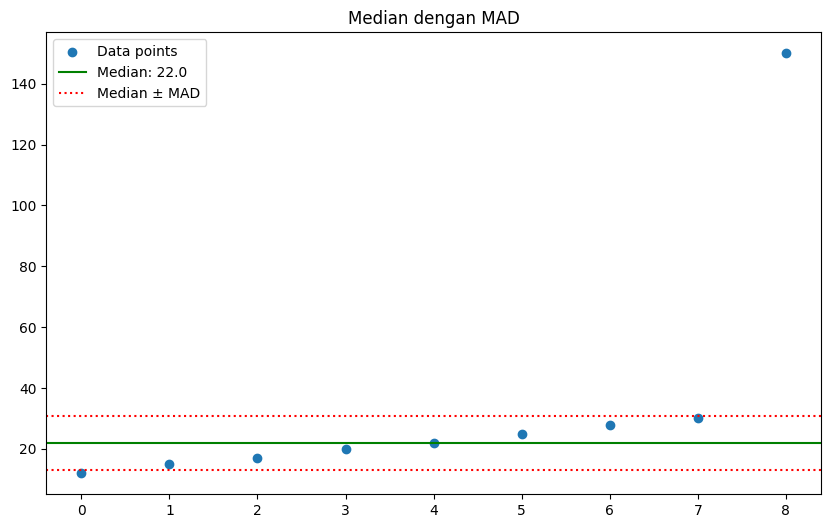

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(data)), data, label='Data points')
plt.axhline(median, color='g', label=f'Median: {median}')
plt.axhline(median + mad, color='r', linestyle=':', label=f'Median ± MAD')
plt.axhline(median - mad, color='r', linestyle=':')
plt.title('Median dengan MAD')
plt.legend()
plt.show()

# 5. Aplikasi Real: Analisis Gaji

# generate data gaji dengan outlier

In [25]:
np.random.seed(42)
gaji = np.concatenate([
    np.random.normal(8000000, 1000000, 50),
    np.array([25000000, 30000000])
])

## hitung statistik